# Feature Engineering Techniques

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette=sns.husl_palette(s=1), context='talk')

In [20]:
train = pd.read_csv('train.csv')

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.shape

(891, 12)

## One-Hot Encoding

**Problem**: you have a categorical feature (cannot be used by e.g. LogReg, can be interpreted by some techniques)

**Solution**: convert to multiple binary columns (using pd.get_dummies)

- results in multiple columns/features (model parameters)
- results in binary types
- works for hundreds of categories

In [25]:
train['Embarked'] #Problem

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [27]:
onehot = pd.get_dummies(train['Embarked']) #Solution
train2 = pd.concat([train, onehot], axis=1) # <-- glues two dfs together horizontally
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fixed,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0,0,1


### Alternative: Factorization

- results in single column (one model parameter)
- results in ordinal type (might not be meaningful.. Q is "between" C and S)

In [28]:
train['Embarked'].replace({'C':1, 'Q':2, 'S':3})

0      3.0
1      1.0
2      3.0
3      3.0
4      3.0
      ... 
886    3.0
887    3.0
888    3.0
889    1.0
890    2.0
Name: Embarked, Length: 891, dtype: float64

## Target Encoding
Replace a category by its mean target (y)

**Alternative** to One-Hot encoding that results in only one new feature.

**Example:** Calculate mean survival chance for male and females and replace 'Sex' column by those mean values

In [33]:
means = train2.groupby('Sex')['Survived'].mean()
train2['sex_target_enc'] = train2['Sex'].replace (means.to_dict())
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fixed,C,Q,S,sex_target_enc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,0,0,1,0.188908
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,1,0,0,0.742038
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,0,0,1,0.742038
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,0,0,1,0.742038
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,0,0,1,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,0,0,1,0.188908
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,0,0,1,0.742038
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,0,0,1,0.742038
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,1,0,0,0.188908


## Binning
Take a numerical column and convert it to multiple (one-hot encoded) categories

In [36]:
train2['child'] = (train['Age'] < 14).astype(int)
train2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fixed,C,Q,S,sex_target_enc,child
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,0,0,1,0.188908,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,1,0,0,0.742038,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,0,0,1,0.742038,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,0,0,1,0.742038,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,0,0,1,0.188908,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,0,0,1,0.188908,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,0,0,1,0.742038,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,0,0,1,0.742038,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,1,0,0,0.188908,0


In [43]:
bins = pd.cut(train2['Age'], bins=4) #creates 4 equally wide buckets
bins = pd.get_dummies(bins)          #creates 4 one-hot encoded features
bins.head()
#train2 = pd.concat([train2, bins], axis=1)

,"(0.34, 20.315]","(20.315, 40.21]","(40.21, 60.105]","(60.105, 80.0]"
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [45]:
#quantile bins
qbins = pd.qcut(train2['Age'], q=4) #creates 4 buckets with the same number of passengers
qbins

0       (20.125, 28.0]
1         (28.0, 38.0]
2       (20.125, 28.0]
3         (28.0, 38.0]
4         (28.0, 38.0]
            ...       
886     (20.125, 28.0]
887    (0.419, 20.125]
888                NaN
889     (20.125, 28.0]
890       (28.0, 38.0]
Name: Age, Length: 891, dtype: category
Categories (4, interval[float64]): [(0.419, 20.125] < (20.125, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

## Scaling
Convert a numerical column so that it has a defined minimum and maximum

In [48]:
# min-max scaling: min=0, max=1.0
# subtract the minimum, devide by range
train2['Age_scaled'] = (train['Age'] - train['Age'].min()) / (train['Age'].max() - train['Age'].min())

In [49]:
train2['Age_scaled'].describe()

count    714.000000
mean       0.367921
std        0.182540
min        0.000000
25%        0.247612
50%        0.346569
75%        0.472229
max        1.000000
Name: Age_scaled, dtype: float64

**Hint:** There is a good way to do this using a scikit function!

## Interaction Terms
Multiply two features
- Very high level of detail, potentially **very powerful**

In [50]:
train2['Pclass*C'] = train2['Pclass'] * train2['C']

In [51]:
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,sex_target_enc,child,"(0.34, 20.315]","(20.315, 40.21]","(40.21, 60.105]","(60.105, 80.0]",Age_scaled,Pclass*C
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0.188908,0,0,1,0,0,0.271174,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0.742038,0,0,1,0,0,0.472229,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,0.742038,0,0,1,0,0,0.321438,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0.742038,0,0,1,0,0,0.434531,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0.188908,0,0,1,0,0,0.434531,0


## Strategy
- select some of your engineered columns (or all of them)
- train the model
- look at the accuracy
- repeat, and see if accurcy goes up

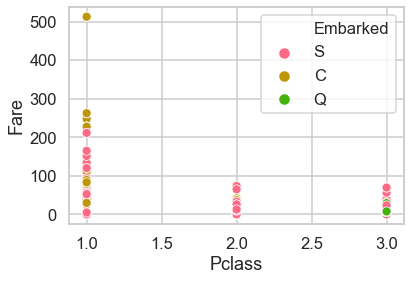

In [68]:
sns.scatterplot(train2['Pclass'], train2['Fare'], hue=train2['Embarked'])

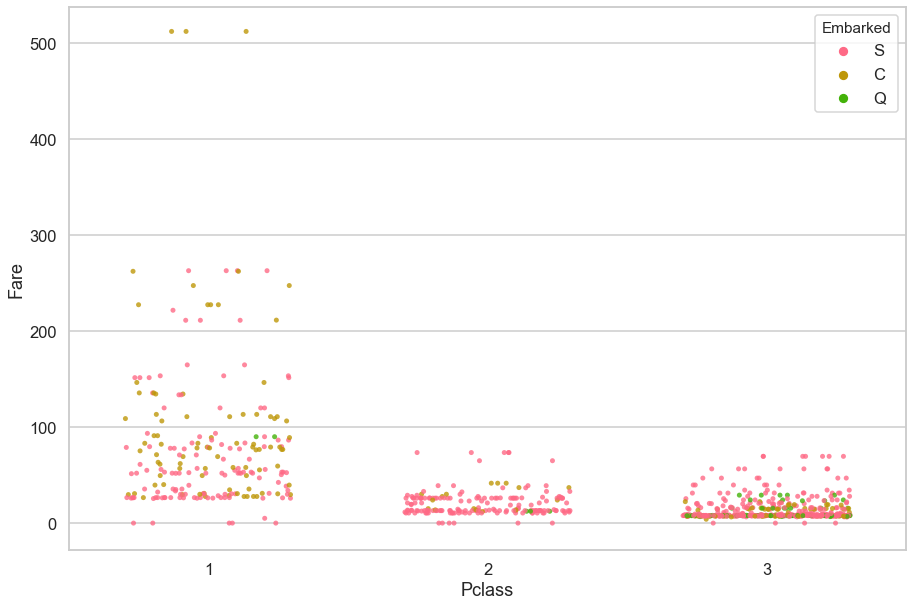

In [91]:
plt.figure(figsize=(15,10))
sns.stripplot(x="Pclass", y="Fare", hue="Embarked", data=train, jitter=0.3, alpha=0.8)

In [101]:
train[train['Fare'] > 200][['Name', 'Ticket', 'SibSp']]

,Name,Ticket,SibSp
27,"Fortune, Mr. Charles Alexander",19950,3
88,"Fortune, Miss. Mabel Helen",19950,3
118,"Baxter, Mr. Quigg Edmond",PC 17558,0
258,"Ward, Miss. Anna",PC 17755,0
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",PC 17558,0
311,"Ryerson, Miss. Emily Borie",PC 17608,2
341,"Fortune, Miss. Alice Elizabeth",19950,3
377,"Widener, Mr. Harry Elkins",113503,0
380,"Bidois, Miss. Rosalie",PC 17757,0
438,"Fortune, Mr. Mark",19950,1


In [ ]:
X.shape, y.shape

In [95]:
train['Name'].isin('Cardeza')

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]